In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Problem 1: Discrete Fourier Transform (30 points)
The goal of this problem is to use DFT and understand the roles of magnitude and phase
components of an image in the frequency domain (Helpful functions: np.fft.fft2, np.fft.ifft2,
np.fft.fftshift, np.fft.ifftshift, np.abs, np.angle, real, mesh)

a) (5 points) Read both the images, figures.jpg and taj_mahal.jpg, and convert them to
grayscale. Display both the colored and the corresponding gray-scale images in a 2x2
grid.

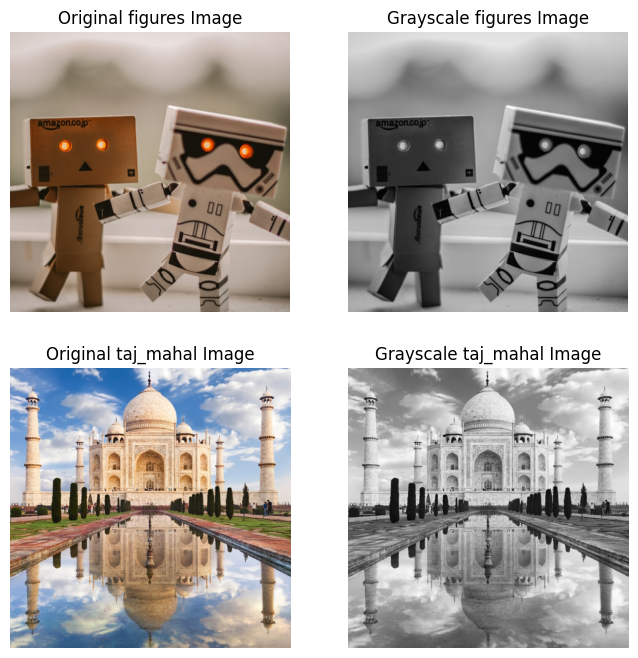

In [3]:
def grayscale(img, weights=[1/3, 1/3, 1/3]):
    gray = np.zeros((img.shape[0], img.shape[1]))
    gray[:] = weights[0] * img[:, :, 0] + weights[1] * img[:, :, 1] + weights[2] * img[:, :, 2]
    return gray

figures = mpimg.imread('images/figures.jpg')
taj_mahal = mpimg.imread('images/taj_mahal.jpg')
g_figures= grayscale(img=figures)
g_taj_mahal = grayscale(img=taj_mahal)

fig = plt.figure(figsize=(8, 8))
ax = []
for i in range(4):
    ax.append(fig.add_subplot(2,2,i+1))
    ax[i].axis('off')
ax[0].title.set_text('Original figures Image')
ax[1].title.set_text('Grayscale figures Image')
ax[2].title.set_text('Original taj_mahal Image')
ax[3].title.set_text('Grayscale taj_mahal Image')
ax[0].imshow(figures)
ax[1].imshow(g_figures, cmap='gray')
ax[2].imshow(taj_mahal)
ax[3].imshow(g_taj_mahal, cmap='gray')
plt.show()

b) (5 points) Compute the DFT of the gray-scale version of figures.jpg. Calculate the
DFT phase component and the logarithm of the DFT magnitude component, and perform
full-scale contrast stretch (FSCS) on both these components. Show the results side by
side. Please move the low frequency part to the center (helpful functions: np.fft.fft2,
np.fft.fftshift).

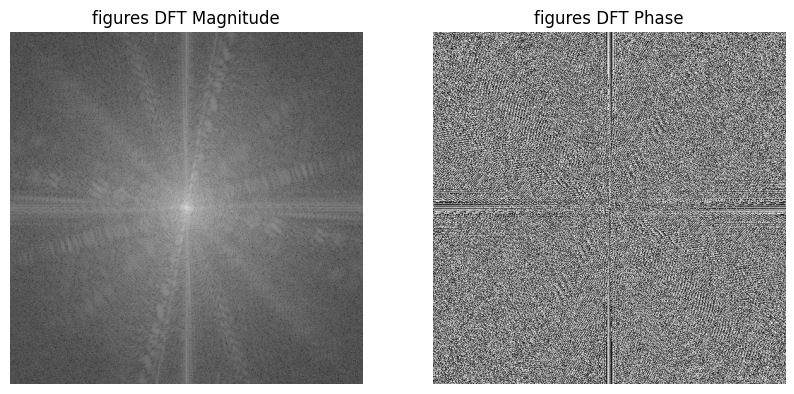

In [12]:
def func_fscs(img):
    A = np.amin(img)
    B = np.amax(img)
    P = (256 - 1) / (B - A)
    L = -A * (256 - 1) / (B - A)
    rows = img.shape[0]
    cols = img.shape[1]
    fscs_img = img.copy()
    for i in range(rows):
        for j in range(cols):
            fscs_img[i][j] = P * fscs_img[i][j] + L
    return fscs_img

dft = np.fft.fft2(g_figures)
dft_mag = np.abs(dft)
dft_phase = np.angle(dft)
mag = func_fscs(np.fft.fftshift(np.log(dft_mag)))
phase = func_fscs(np.fft.fftshift(dft_phase))

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('figures DFT Magnitude')
ax2.title.set_text('figures DFT Phase')
ax1.imshow(mag, cmap='gray')
ax2.imshow(phase, cmap='gray')
plt.show()

c) (5 points) Add pi to the original DFT phase component of the gray-scale version of
figures.jpg. Perform the inverse DFT to reconstruct the image using the modified DFT
phase (after adding pi) and the original DFT magnitude components (use the
components before FSCS). Show the original and the reconstructed figures.jpg side by
side. Can you explain the result mathematically? (Hint: Keep only the real part of the
inverse DFT, because the imaginary parts may be generated due to rounding errors.)

**Answer:** The resultant reconstructed image has the intensities of the original image inverted. This makes sense since the phase of an image tells us information about the structure of the image so multiplying each phase by a factor of e^sqrt(pi) = -1 causes each amplitude to be placed on the opposite end of the period relative to the center.

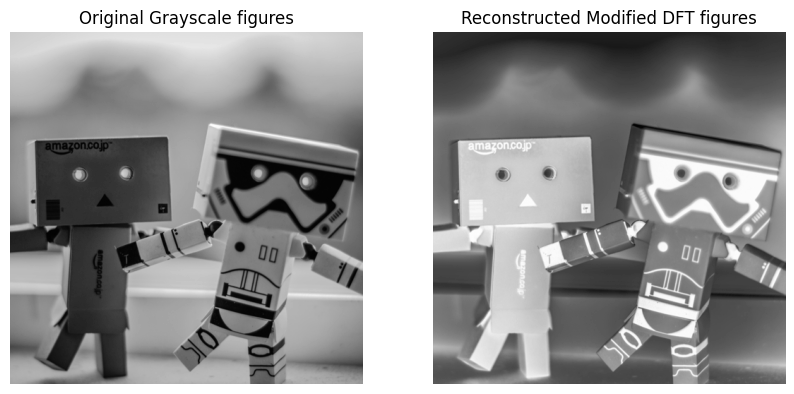

In [10]:
def reconstruct(dft_mag, dft_phase):
    dft = np.multiply(dft_mag, np.exp(1j * dft_phase))
    return np.fft.ifft2(dft)

modified_dft_phase = dft_phase + np.pi
reconstructed = reconstruct(dft_mag, modified_dft_phase)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('Original Grayscale figures')
ax2.title.set_text('Reconstructed Modified DFT figures')
ax1.imshow(g_figures, cmap='gray')
ax2.imshow(np.real(reconstructed), cmap='gray')
plt.show()

d) (5 points) Increase the original DFT magnitude component of the gray-scale version of
figures.jpg to the following powers: 1.5 and 0.3. Perform the inverse DFT to
reconstruct the image using the modified DFT magnitude and the original DFT phase
components (before the FSCS). Show the two reconstructed images and the original
image in a 1x3 grid. Can you explain the effects you observe after the exponentiation
operation? (helpful function: mesh).

**Answer:** Exponentiating the DFT magnitudes causes the intensities of the image to be raised to the respective powers. As such, for the 1.5 power case we see a sort of bloom effect where the light intensity is accentuated, while for the 0.3 power case we see the intensities all being brought down and close to the same level (resulting in the image lacking contrast).

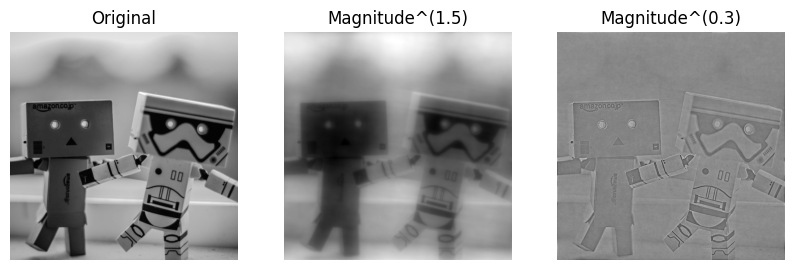

In [11]:
modified_dft_mag_1 = dft_mag ** 1.5
modified_dft_mag_2 = dft_mag ** 0.5
reconstructed_1 = reconstruct(modified_dft_mag_1, dft_phase)
reconstructed_2 = reconstruct(modified_dft_mag_2, dft_phase)

fig = plt.figure(figsize=(10, 4))
im1 = fig.add_subplot(1,3,1)
im2 = fig.add_subplot(1,3,2)
im3 = fig.add_subplot(1,3,3)
im1.axis('off')
im2.axis('off')
im3.axis('off')
im1.title.set_text('Original')
im2.title.set_text('Magnitude^(1.5)')
im3.title.set_text('Magnitude^(0.3)')
im1.imshow(g_figures, cmap='gray')
im2.imshow(np.real(reconstructed_1), cmap='gray')
im3.imshow(np.real(reconstructed_2), cmap='gray')
plt.show()

e) (5 points) Truncate the shifted DFT component of the gray-scale version of
figures.jpg by a truncation window (you can determine the size and shape) to keep
~25%, ~12.5%, and ~6.25% of the DFT coefficients in center. Perform the inverse DFT
to reconstruct the image using the modified DFT (remember to undo the FSCS if
required). Show the original and the three reconstructed figures.jpg images in a 2x2
grid with the appropriate labels. (Hint: Keep only the real part of the inverse DFT,
because the imaginary parts may be generated due to rounding errors.)

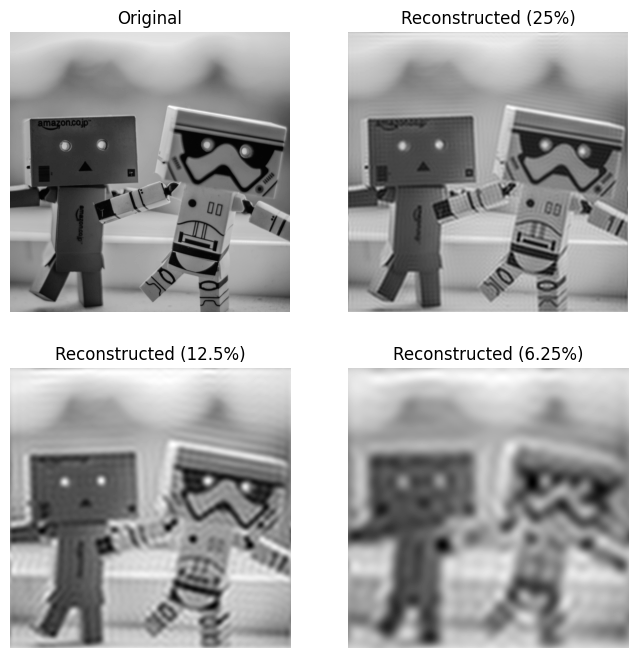

In [15]:
def truncate(img, fraction_to_keep):
    rows, cols = img.shape
    window_height = fraction_to_keep * rows
    window_width = fraction_to_keep * cols
    square_window = np.zeros((rows, cols))
    for i in range(int((rows - window_height) / 2), int((rows + window_height) / 2)):
        for j in range(int((cols - window_width) / 2), int((cols + window_width) / 2)):
            square_window[i][j] = 1
    return np.multiply(img, square_window)

centered_dft = np.fft.fftshift(dft)
truncated_25 = truncate(centered_dft, 0.25)
truncated_12_5 = truncate(centered_dft, 0.125)
truncated_6_25 = truncate(centered_dft, 0.0625)
reconstructed_25 = np.fft.ifft2(np.fft.ifftshift(truncated_25))
reconstructed_12_5 = np.fft.ifft2(np.fft.ifftshift(truncated_12_5))
reconstructed_6_25 = np.fft.ifft2(np.fft.ifftshift(truncated_6_25))

fig = plt.figure(figsize=(8, 8))
ax = []
for i in range(4):
    ax.append(fig.add_subplot(2,2,i+1))
    ax[i].axis('off')
ax[0].title.set_text('Original')
ax[1].title.set_text('Reconstructed (25%)')
ax[2].title.set_text('Reconstructed (12.5%)')
ax[3].title.set_text('Reconstructed (6.25%)')
ax[0].imshow(g_figures, cmap='gray')
ax[1].imshow(np.real(reconstructed_25), cmap='gray')
ax[2].imshow(np.real(reconstructed_12_5), cmap='gray')
ax[3].imshow(np.real(reconstructed_6_25), cmap='gray')
plt.show()

f) (5 points) Let the original DFT magnitude component of the gray-scale version of
figures.jpg be the same, and replace its DFT phase component with that of the
gray-scale version of taj_mahal.jpg. Perform the inverse DFT to reconstruct this phase-off
image. Show the resulting image, with full-scale contrast stretch if necessary, and the
original figures.jpg image side by side. Write a few lines about what you observe,
regarding what information the magnitude and phase components carry in the frequency
domain.

**Answer:** The DFT phase component contributes most to the structural description of the image, while the magnitude describes the intensities over different frequencies. This is why when we reconstruct the image with the phase of taj_mahal.jpg, we see the taj mahal and all structural information from figures.jpg is lost.

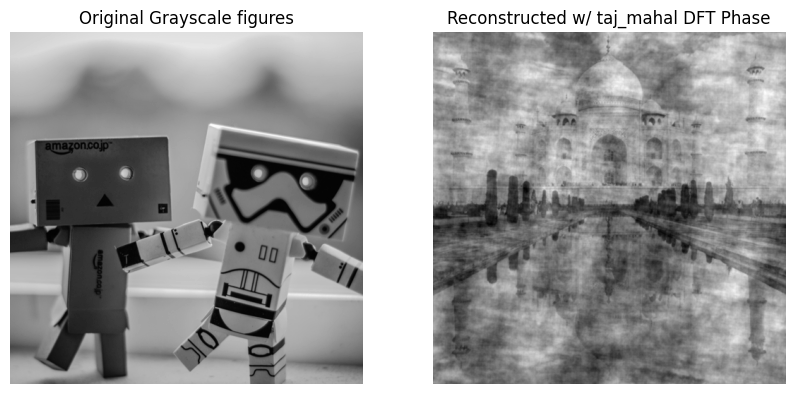

In [16]:
taj_mahal_dft = np.fft.fft2(g_taj_mahal, g_figures.shape)
taj_mahal_dft_phase = np.angle(taj_mahal_dft)
reconstructed = reconstruct(dft_mag, taj_mahal_dft_phase)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('Original Grayscale figures')
ax2.title.set_text('Reconstructed w/ taj_mahal DFT Phase')
ax1.imshow(g_figures, cmap='gray')
ax2.imshow(np.real(reconstructed), cmap='gray')
plt.show()

# Problem 2: Linear and Non-Linear Image Filtering (45 points)
The goal of this problem is to understand some types of image noise, and compare linear and
non-linear image filtering. (Useful functions: getGaussianKernel, filter2D, median,
np.random.normal, np.random.randint)

a) (5 points) You need to write a function, “average_filter()”. The function will have the
parameters as follows: average_filter(image, window_size). The function should
implement the average filtering on an image with square windows (helpful function:
filter2D).

In [27]:
def average_filter(img, window_size):
    kernel = np.ones((window_size, window_size), np.float32) / (window_size ** 2)
    return cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

b) (5 points) You need to write a function, “median_filter()”. The function will have the
parameters as follows: median_filter(image, window_size). The function should
implement the median filtering on an image with square windows (helpful function:
median).

In [28]:
def median_filter(img, window_size):
    rows = img.shape[0]
    cols = img.shape[1]
    padded = np.pad(array=img, pad_width=int(window_size / 2), mode='constant')
    windows = np.lib.stride_tricks.sliding_window_view(padded, (window_size, window_size))
    return np.median(windows.reshape(rows, cols, 1, window_size * window_size), axis=3).reshape(rows, cols)

c) (5 points) You need to write a function, “gaussian_filter()”. The function will have the
parameters as follows: gaussian_filter(image, window_size, sigma). The function should
implement the Gaussian filtering on an image with different window sizes and σ
(standard deviation) (helpful function: getGaussianKernel).

In [29]:
def gaussian_filter(img, window_size, sigma):
    kernel = cv2.getGaussianKernel(window_size, sigma)
    kernel = kernel * np.transpose(kernel)
    return cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

d) (10 points) Read the image, goat.jpg, and convert it into gray-scale. Add 5%
salt-and-pepper noise to the image. This means on an average, 2.5% of the pixels are
changed to 255 and 2.5% of the pixels are changed to 0 (helpful function:
np.random.randint). Apply the three different filters you implement above to the noisy
image. Show the noisy image and the best de-noised results from the three filters in
terms of MSE (Mean Squared Error) in a 2x2 grid (with appropriate labels), and report
both the resulting MSE and the parameters you picked for each filter. Write a few lines
explaining the results and why the filter that works best does so.

**Answer:** MSEs are reported in the label for each image. Each filter was using a 3x3 window and the value of sigma for the gaussian filter is 1. Using higher window sizes decreased the amount of noise at the cost of blurring two much, and after some experimentation 3x3 seemed the best (especially for the median filter). The median filter had the best MSE, and the results make sense since the salt-and-pepper noise adds extreme values which will most likely be cut off by the median filter (while extreme values still significantly contribute to average and gaussian filter kernels)

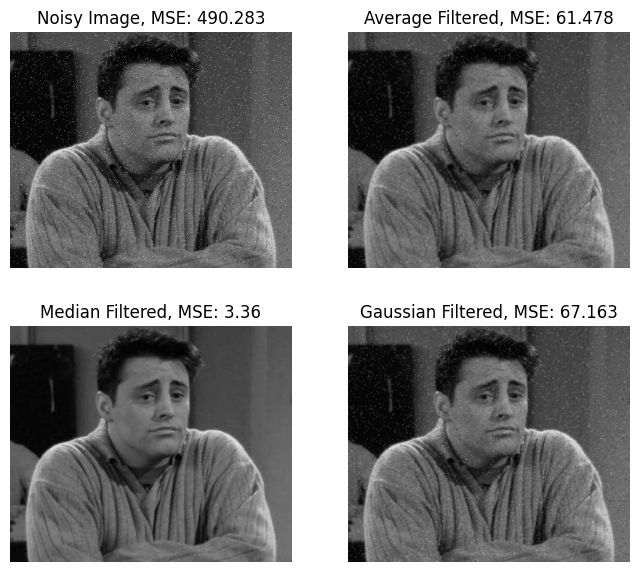

In [30]:
def snp_noise(img, fraction):
    upper_bound = (1 / (fraction / 2)) + 1
    salt = ((np.random.randint(0, upper_bound, img.shape).clip(0, 1) * -1) + 1) * 255
    pepper = np.random.randint(0, upper_bound, img.shape).clip(0, 1)
    return np.multiply(np.maximum(img, salt), pepper)

def MSE(img1, img2, precision=3):
    return round(np.square(np.subtract(img1, img2)).mean(), precision)

joey = mpimg.imread('images/joey.jpg')
g_joey = grayscale(img=joey)
noisy_joey = snp_noise(g_joey, 0.025)
avg = average_filter(noisy_joey, 3)
med = median_filter(noisy_joey, 3)
gau = gaussian_filter(noisy_joey, 3, 1)

fig = plt.figure(figsize=(8, 7))
ax = []
for i in range(4):
    ax.append(fig.add_subplot(2,2,i+1))
    ax[i].axis('off')
ax[0].title.set_text('Noisy Image, MSE: ' + str(MSE(g_joey, noisy_joey)))
ax[1].title.set_text('Average Filtered, MSE: ' + str(MSE(g_joey, avg)))
ax[2].title.set_text('Median Filtered, MSE: ' + str(MSE(g_joey, med)))
ax[3].title.set_text('Gaussian Filtered, MSE: ' + str(MSE(g_joey, gau)))
ax[0].imshow(noisy_joey, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(avg, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(med, cmap='gray', vmin=0, vmax=255)
ax[3].imshow(gau, cmap='gray', vmin=0, vmax=255)
plt.show()


e) (10 points) Read the image, goat.jpg, and convert it into gray-scale. Add Gaussian white
noise of zero mean and σ= 0.1 to the image (helpful function: np.random.normal). Apply
the three different filters you implement above to the noisy image. Show the noisy image
and the best de-noised results from the three filters in terms of MSE in a 2x2 grid (with
appropriate labels), and report both the resulting MSE and the parameters you picked for
each filter. Write a few lines explaining the results and why the filter that works best does
so. (Hint: Add the Gaussian white noise to the normalized image, i.e., intensity scaled to
[0 1], or alternatively, scale the Gaussian white noise based on the range of image
intensity.)

**Answer:** MSEs are reported in the label for each image. Each filter was using a 3x3 window and the value of sigma for the gaussian filter is 1. The gaussian filter had the best MSE which makes sense since the noise is gaussian with zero mean so taking a weighted average of pixels based on their closeness to a center pixel averages out the error towards zero. For a similar reason, the average filter also does pretty well. The median filter does not do very well in this case since now the noise is no longer extreme (as it was in the salt-and-pepper noise case), so the noise has a more significant impact on the median calculations.

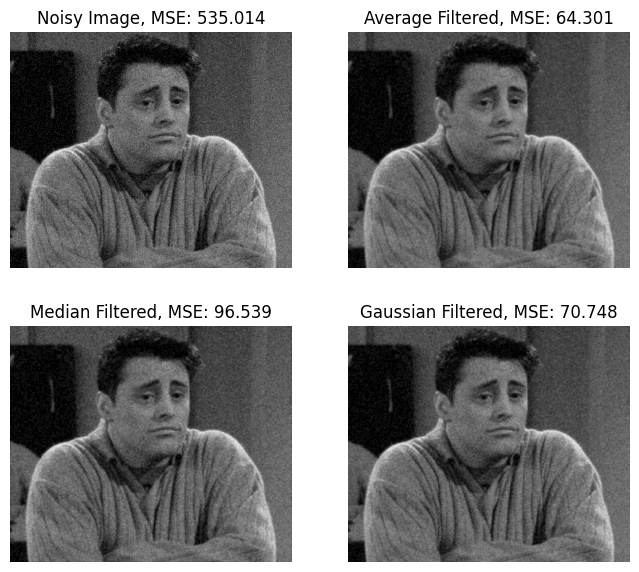

In [31]:
def gaussian_noise(img, mean, sigma):
    max = np.max(img)
    min = np.min(img)
    normalized = (img - min) / (max - min)
    noise = np.random.normal(mean, sigma, img.shape)
    return (normalized + noise) * (max - min) + min

noisy_joey = gaussian_noise(g_joey, 0, 0.1)
avg = average_filter(noisy_joey, 3)
med = median_filter(noisy_joey, 3)
gau = gaussian_filter(noisy_joey, 3, 1)

fig = plt.figure(figsize=(8, 7))
ax = []
for i in range(4):
    ax.append(fig.add_subplot(2,2,i+1))
    ax[i].axis('off')
ax[0].title.set_text('Noisy Image, MSE: ' + str(MSE(g_joey, noisy_joey)))
ax[1].title.set_text('Average Filtered, MSE: ' + str(MSE(g_joey, avg)))
ax[2].title.set_text('Median Filtered, MSE: ' + str(MSE(g_joey, med)))
ax[3].title.set_text('Gaussian Filtered, MSE: ' + str(MSE(g_joey, gau)))
ax[0].imshow(noisy_joey, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(avg, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(med, cmap='gray', vmin=0, vmax=255)
ax[3].imshow(gau, cmap='gray', vmin=0, vmax=255)
plt.show()

f) (5 points) We will now try doing linear filtering using the DFT. You need to write a function, “linear_filter(image, h)”. This function should filter an image by pointwise multiplication in the DFT domain with a frequency response template ‘h’ (Hint: don’t forget to account for the wrap-around effect). Now, let’s use a simple linear filter to blur the image. Perform this operation twice, once using “average_filter()” with a 15x15 window, and once using “linear_filter()” and a corresponding 15x15 kernel. Display the results of both in a 1x2 window. Explain the similarities and differences if any in the images.

**Answer:** The main content of the image should be essentially the same (very slight differences due to rounding). The main difference is the black border that appears around the filtered image using the DFTs. This is because of zero padding that we do to account for the wraparound effect. If we did not do this padding we would see a reflection effect of opposite sides on the edges.

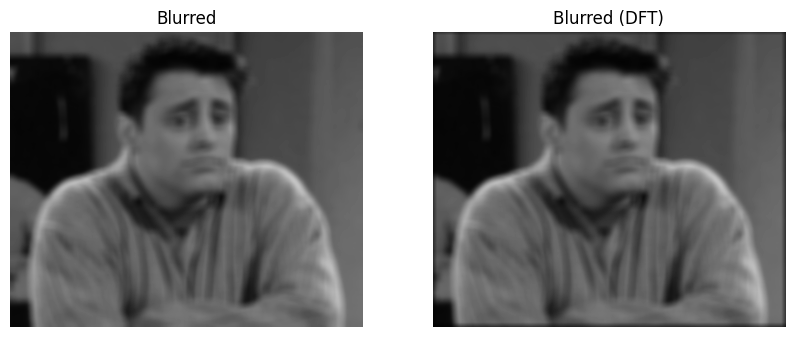

In [34]:
def linear_filter(img, h):
    rows = img.shape[0] + h.shape[0]
    cols = img.shape[1] + h.shape[1]
    dft_img = np.fft.fft2(img, (rows, cols))
    dft_h = np.fft.fft2(h, (rows, cols))
    dft = np.multiply(dft_img, dft_h)
    unpad_rows = h.shape[0] // 2
    unpad_cols = h.shape[1] // 2
    return np.fft.ifft2(dft)[unpad_rows:-unpad_rows, unpad_cols:-unpad_cols]


factor = 15
avg_kernel = np.ones((factor, factor)) / factor**2

avg = average_filter(g_joey, factor)
avg2 = linear_filter(g_joey, avg_kernel)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('Blurred')
ax2.title.set_text('Blurred (DFT)')
ax1.imshow(avg, cmap='gray', vmin=0, vmax=255)
ax2.imshow(np.real(avg2), cmap='gray', vmin=0, vmax=255)
plt.show()

# Problem 3 - Convolutional Neural Networks (30 points)
The goal of this problem is to get you used to machine learning for image processing. We will use CNNs to create a classifier for images of digits. In other words, we want our model to tell us whether the digit in the image is one of 0, 1, 2, …, 9. We recommend that you use PyTorch for this question as it is one of the most popular machine learning frameworks and is a good choice for implementing your projects (if they are related to machine learning).

a) (5 points) We will be using the MNIST dataset for this problem. This dataset contains a large collection of 28x28 grayscale images corresponding to handwritten digits (0-9). It is usually split into two sets: the training set (60,000 images) and the testing set (10,000 images). Download this dataset and visualize 6 of the images in a 2x3 grid, with labels indicating the corresponding values that are displayed in the images.

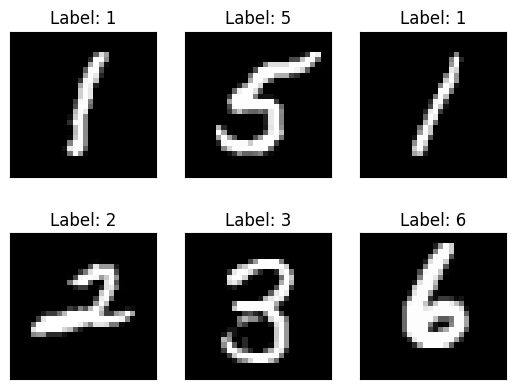

In [37]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# Hyperparameters -- feel free to play around with these
BATCH_SIZE = 100
LEARNING_RATE = 0.001
MOMENTUM = 0.9

# Number of training batches to go over before we test the model
TEST_FREQUENCY = 100

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=100, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=100, shuffle=True)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(example_data[i][0], cmap="gray")
    plt.title("Label: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

b) (5 points) Implement a CNN architecture that you will train to classify these handwritten digits. In the starter code we provide guidance on how to implement the LeNet5 architecture, however you are free to research and implement a model of your choosing

In [38]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

c) (5 points) Initialize the network and visualize 6 testing images along with labels corresponding to predictions made by your untrained network.

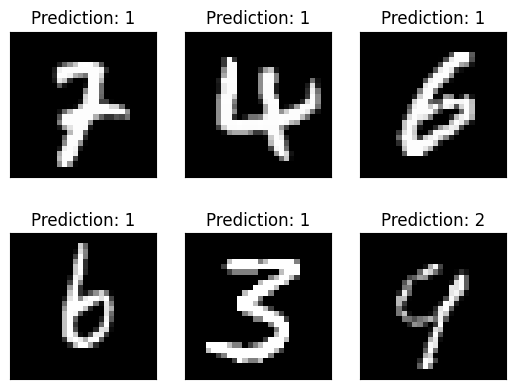

In [44]:
# Initialize the network, loss function (cross entropy), and optimizer (SGD)
net = Net()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
outputs = net(example_data)
_, predicted = torch.max(outputs.data, 1)
fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(example_data[i][0], cmap="gray")
    plt.title("Prediction: {}".format(predicted[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

d) (10 points) Train the model for at least 1 epoch (meaning 1 pass through the entire training dataset). We recommend that you use stochastic gradient descent (SGD) for optimizing the network and use cross entropy loss as your loss function. Feel free to play around with training hyperparameters, here are some that you can start with: batch_size=100, learning_rate=0.001, momentum=0.9. Report the accuracy of your model on the testing dataset once you are done training

In [45]:
accuracy = []
loss = []

# Define a function for testing the network
def test(net, test_loader, loss_fn):
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = net(inputs)
            loss = loss_fn(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return test_loss / len(test_loader), accuracy

# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    running_loss = 0.0
    for batch_no, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        if (batch_no % TEST_FREQUENCY == 0):
            test_loss, accuracy = test(net, test_loader, loss_fn)
            print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_no}/{len(train_loader)}, Train Loss: {loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")
test_loss, accuracy = test(net, test_loader, loss_fn)
print(f"Final Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")
torch.save(net, 'model.pth')

Epoch 1/1, Batch 0/600, Train Loss: 2.3032, Test Loss: 2.3047, Accuracy: 15.59%
Epoch 1/1, Batch 100/600, Train Loss: 2.2786, Test Loss: 2.2780, Accuracy: 24.74%
Epoch 1/1, Batch 200/600, Train Loss: 2.2325, Test Loss: 2.2278, Accuracy: 47.56%
Epoch 1/1, Batch 300/600, Train Loss: 1.9817, Test Loss: 1.9568, Accuracy: 61.42%
Epoch 1/1, Batch 400/600, Train Loss: 0.7580, Test Loss: 0.7430, Accuracy: 80.75%
Epoch 1/1, Batch 500/600, Train Loss: 0.4755, Test Loss: 0.4515, Accuracy: 87.29%
Final Test Loss: 0.3509, Accuracy: 90.20%


e) (5 points) Visualize 6 testing images along with labels corresponding to predictions made by your trained network.

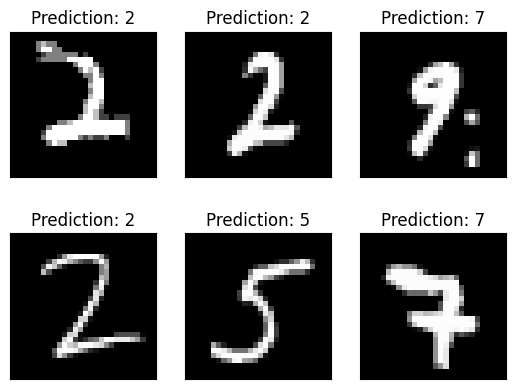

In [46]:
net = torch.load('model.pth')
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
outputs = net(example_data)
_, predicted = torch.max(outputs.data, 1)
fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(example_data[i][0], cmap="gray")
    plt.title("Prediction: {}".format(predicted[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()